<a href="https://colab.research.google.com/github/MariaMeram/clinical_records/blob/main/clinical_records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
#Loaded the data
data1 = pd.read_csv("Heart_failure_clinical_records_dataset.csv")

**EDA**

In [3]:
#shape
data1.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
#rows and columns
print(f'Numero de filas: {data1.shape[0]}')
print(f'Numero de columnas: {data1.shape[1]}')

Numero de filas: 299
Numero de columnas: 13


In [5]:
#INFO
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 30.5 KB


In [6]:
#DESCRIBE
data1.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.879599,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.911540,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [7]:
data1.isnull()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


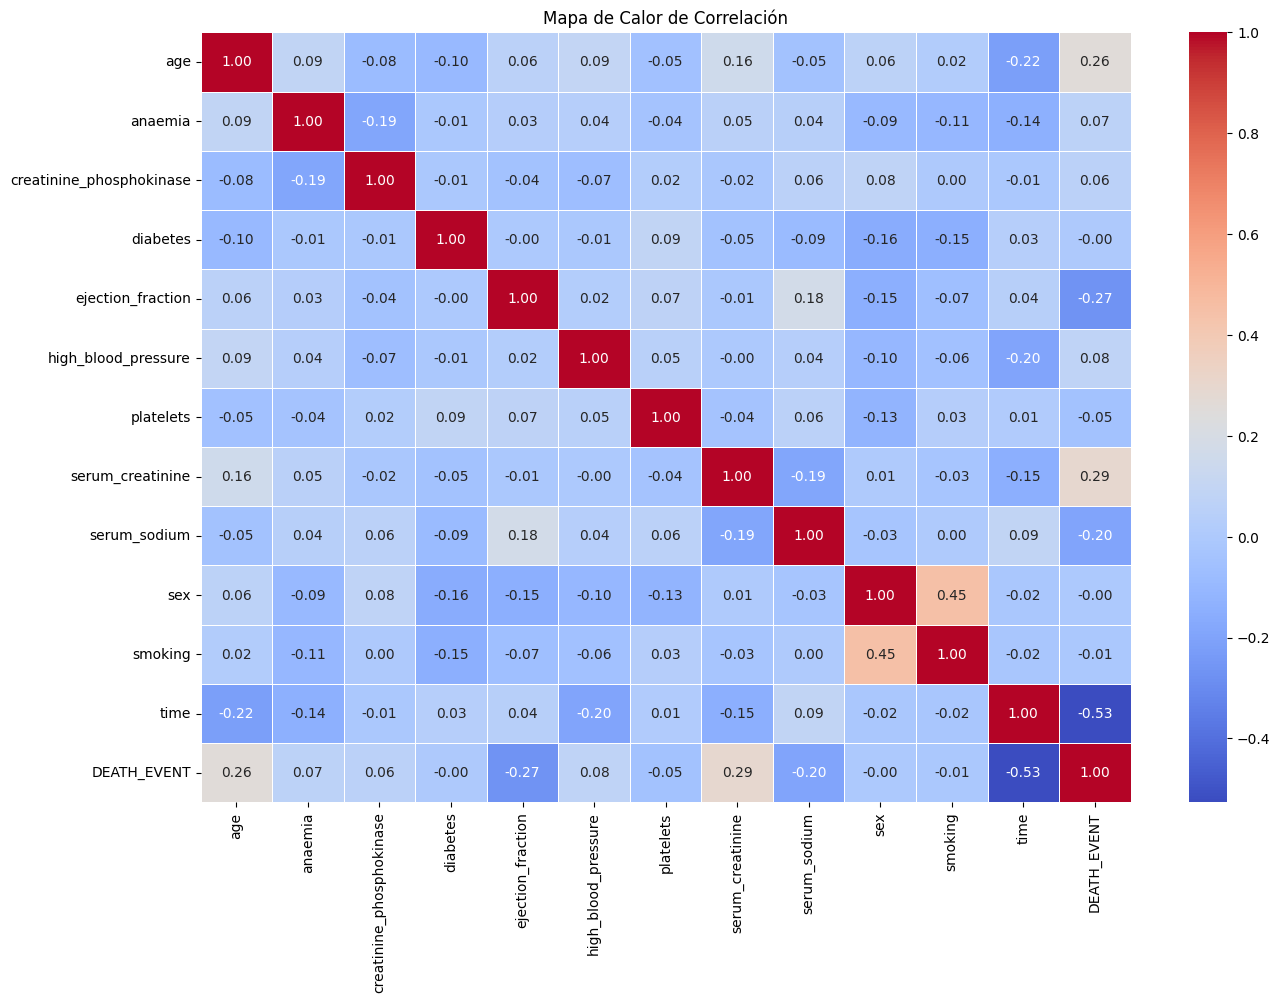

In [8]:
correlation_matrix = data1.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor de Correlación')
plt.show()

### Conclusion

**DEATH_EVENT** is strongly linked to **age** and **serum creatinine levels**, and it has a significant inverse correlation with the follow-up period and the percentage of blood expelled from the heart with each beat. Additionally, variables like the presence of **diabetes** and **gender** have a weak correlation.

In contrast, the **time** variable has a moderately negative correlation with **DEATH_EVENT**, which suggests that a longer follow-up period is associated with a lower probability of death. This could be due to prolonged treatments or studies.

On the other hand, variables such as **smoking** and **sex** have low correlations with most of the other variables, including **DEATH_EVENT**. These weaker correlations suggest a less direct relationship.

In [14]:
#Divide the dataset into training and testing sets.

#divide the target
X = data1.drop('DEATH_EVENT', axis=1)
y = data1['DEATH_EVENT']

#The dataset is being split into a training and a testing set, with the test set typically being 20%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
##REGRESSION MODEL

import statsmodels.api as sm

# Adding a constant column for the intercept
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Instantiating and fitting the logistic regression model with StatsModels
log_reg_sm = sm.Logit(y_train, X_train_sm).fit()

# Displaying the model summary
print(log_reg_sm.summary())


Optimization terminated successfully.
         Current function value: 0.325015
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:            DEATH_EVENT   No. Observations:                  239
Model:                          Logit   Df Residuals:                      226
Method:                           MLE   Df Model:                           12
Date:                Sat, 09 Aug 2025   Pseudo R-squ.:                  0.4658
Time:                        07:24:02   Log-Likelihood:                -77.679
converged:                       True   LL-Null:                       -145.40
Covariance Type:            nonrobust   LLR p-value:                 4.975e-23
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        9.2280      6.707      1.376      0.169      -3.917

In [18]:
### Perform the prediction with the test data

X_test = sm.add_constant(X_test, prepend=True).rename(columns={'const':'intercept'})
y_pred_test = log_reg_sm.predict(exog=X_test)
print(f"Pronostico con los datos de prueba:{y_pred_test}")
accuracy_test = accuracy_score(y_test, y_pred_test.round())
# Imprimir la precisión en los datos de prueba
print(f'Accuracy en los datos de prueba: {accuracy_test*100}%')

Pronostico con los datos de prueba:281    0.057492
265    0.002836
164    0.091299
9      0.999687
77     0.108216
278    0.016751
93     0.574410
109    0.049657
5      0.959329
173    0.091627
97     0.137550
195    0.041237
184    0.099625
154    0.233616
57     0.251638
60     0.504820
147    0.029524
108    0.305417
63     0.090748
140    0.388952
155    0.383022
104    0.220778
247    0.128813
46     0.618504
42     0.605925
275    0.002846
280    0.017047
116    0.058306
213    0.100222
236    0.005564
17     0.879238
239    0.005968
33     0.726542
24     0.971400
45     0.602973
7      0.255423
113    0.113645
194    0.087376
111    0.247864
92     0.035569
75     0.526774
82     0.923085
118    0.081250
76     0.119577
129    0.384245
197    0.100717
210    0.217691
288    0.021930
219    0.025302
178    0.008950
144    0.495441
186    0.016503
84     0.579916
248    0.003673
277    0.022268
73     0.308506
244    0.026760
25     0.906620
209    0.056389
59     0.893805
dtype

In [20]:
##Using RSE (Residual Standard Error)
# Calculate the residuals
residuals = y_train - y_pred_test

# Calculate the RSE
rse = np.sqrt(np.sum(residuals**2) / (len(y_train) - 2))

print(f'RSE: {rse}')

RSE: 0.0
